In [46]:
import json

In [47]:
with open("train_full.json") as f:
    dataset = json.load(f)

In [48]:
dataset[2]["thread"]

[{'evaluation': 2, 'text': 'Hi', 'userId': 'Bob'},
 {'evaluation': 0, 'text': 'Hi', 'userId': 'Alice'},
 {'evaluation': 0, 'text': 'What do you think abouy it?', 'userId': 'Bob'},
 {'evaluation': 0, 'text': 'About what?', 'userId': 'Alice'},
 {'evaluation': 0, 'text': 'About text', 'userId': 'Bob'}]

## Number of long dialogs

In [49]:
long_dialogs = 0
dialog_lens = []

for d in dataset:
    Alice = 0
    Bob = 0
    for u in d["thread"]:
        if u["userId"] == "Alice":
            Alice += 1
        elif u["userId"] == "Bob":
            Bob += 1
        else: 
            raise ValueError
    
    dialog_lens.append(Alice + Bob)
    if Alice > 2 and Bob > 2:
        long_dialogs += 1

long_dialogs

1719

In [50]:
import matplotlib.pyplot as plt

## Dialog length distribution

(array([ 393.,  231.,  141.,  137.,   93.,  256.,  149.,  106.,  130.,
          86.,  189.,  115.,   71.,   53.,   71.,   96.,   60.,   50.,
          34.,   30.,   48.,   23.,   21.,   23.,   18.,   33.,   15.,
          13.,   12.,    7.,   15.,    2.,    7.,    6.,    3.,    5.,
           3.,    4.,    1.,    0.,    4.,    3.,    1.,    2.,    1.,
           1.,    1.,    0.,    1.,    0.,    3.,    1.,    1.,    0.,
           0.,    0.,    0.,    2.,    1.,    0.,    0.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   0. ,    1.2,    2.4,    3.6,    4.8,    6. ,    7.2,    8.4,
           9.6,   10.8,   12. ,   13.2,   14.4,   15.6,   16.8,   18. ,
          19.2,   20.4,   21.6,   22.8,   24. ,   25.2,   26.4,   

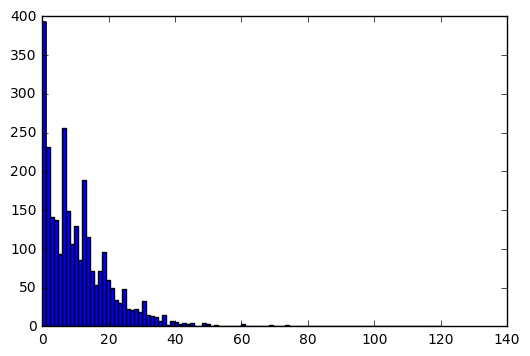

In [51]:
plt.hist(dialog_lens, bins=100)

In [52]:
dataset[3]

{'context': 'Though much of Enlightenment political thought was dominated by social contract theorists, both David Hume and Adam Ferguson criticized this camp. Hume\'s essay Of the Original Contract argues that governments derived from consent are rarely seen, and civil government is grounded in a ruler\'s habitual authority and force. It is precisely because of the ruler\'s authority over-and-against the subject, that the subject tacitly consents; Hume says that the subjects would "never imagine that their consent made him sovereign", rather the authority did so. Similarly, Ferguson did not believe citizens built the state, rather polities grew out of social development. In his 1767 An Essay on the History of Civil Society, Ferguson uses the four stages of progress, a theory that was very popular in Scotland at the time, to explain how humans advance from a hunting and gathering society to a commercial and civil society without "signing" a social contract.',
 'dialogId': -155769874,
 

In [53]:
human_lens = []
bot_lens = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["thread"]:
        if u["userId"] == "Alice":
            if Alice:
                human_lens.append(len(u["text"]))
            else:
                bot_lens.append(len(u["text"]))
        elif u["userId"] == "Bob":
            if Bob:
                human_lens.append(len(u["text"]))
            else:
                bot_lens.append(len(u["text"]))

(array([  1.50360000e+04,   2.33900000e+03,   3.16000000e+02,
          7.20000000e+01,   1.90000000e+01,   5.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

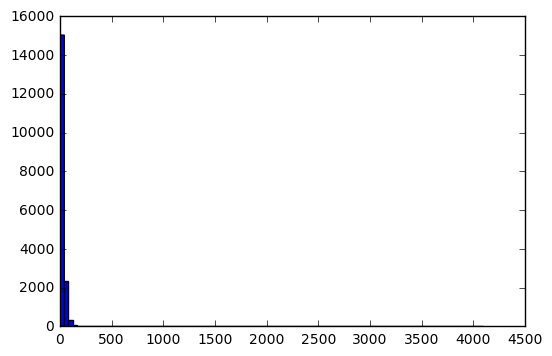

In [54]:
plt.hist(human_lens, bins=100)

(array([  9.59800000e+03,   2.15500000e+03,   7.03000000e+02,
          9.20000000e+01,   1.50000000e+01,   2.50000000e+01,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

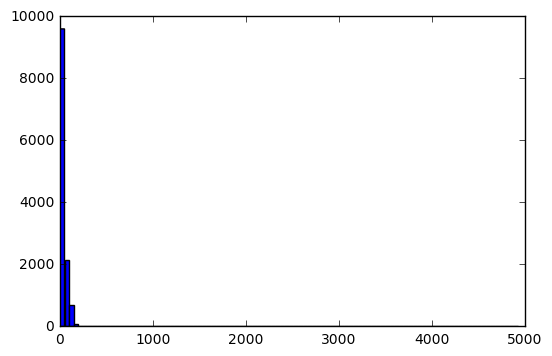

In [55]:
plt.hist(bot_lens, bins=100)

In [56]:
len(human_lens)

17832

In [57]:
len(bot_lens)

12602

In [58]:
filtered_human_lens = list(filter(lambda x: x<200, human_lens))

In [59]:
len(filtered_human_lens)

17781

In [60]:
filtered_bot_lens = list(filter(lambda x: x<200, bot_lens))

In [61]:
len(filtered_bot_lens)

12548

(array([ 192.,  815.,  737.,  643.,  645.,  477.,  362.,  450.,  373.,
         395.,  420.,  547.,  486.,  472.,  375.,  480.,  490.,  465.,
         439.,  403.,  360.,  369.,  355.,  324.,  327.,  350.,  322.,
         304.,  241.,  269.,  260.,  251.,  240.,  201.,  199.,  160.,
         182.,  167.,  198.,  158.,  133.,  143.,  138.,  130.,  106.,
         104.,  110.,   91.,   91.,    0.,   87.,   84.,   86.,   76.,
          61.,   47.,   61.,   74.,   70.,   73.,   45.,   47.,   56.,
          45.,   39.,   50.,   36.,   30.,   26.,   29.,   30.,   27.,
          34.,   19.,   23.,   25.,   21.,   16.,   17.,   20.,   27.,
          29.,   16.,   19.,   17.,   10.,    9.,    9.,   15.,   16.,
          11.,   11.,    9.,   11.,   10.,   11.,    6.,    8.,   10.,
           0.,    7.,    5.,   13.,    4.,    6.,    4.,    5.,    4.,
           3.,    6.,    7.,    7.,    2.,    3.,    9.,    4.,    9.,
           3.,    7.,    7.,    4.,    6.,    1.,    3.,    5.,    0.,
      

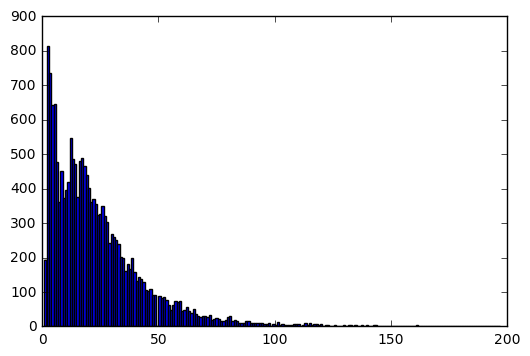

In [62]:
plt.hist(filtered_human_lens, bins=200)

(array([ 216.,   88.,  189.,  373.,  458.,  695.,  339.,  193.,  256.,
         345.,  313.,  188.,  339.,  498.,  157.,  346.,  104.,  157.,
         168.,  151.,  176.,  104.,  147.,  168.,  138.,  156.,  173.,
         189.,  176.,  185.,  136.,  118.,  127.,  135.,  105.,  200.,
         149.,  110.,  101.,  149.,   98.,  115.,  116.,   89.,  206.,
         132.,   81.,   79.,   86.,    0.,   81.,   51.,   65.,   80.,
         183.,   83.,   58.,   56.,  200.,   70.,   80.,   46.,   44.,
          39.,   46.,   37.,   37.,   59.,   56.,   48.,   38.,   24.,
          41.,   22.,   21.,   37.,   29.,   28.,   27.,   26.,   21.,
          31.,   30.,   28.,   32.,   34.,   29.,   28.,   22.,   20.,
          23.,   31.,   28.,   24.,   17.,   24.,   19.,   26.,   33.,
           0.,   24.,   21.,   11.,   41.,   34.,   12.,   26.,   21.,
          13.,   17.,   11.,   15.,   16.,    5.,    6.,    8.,   15.,
           3.,    5.,    5.,    5.,    3.,    5.,    7.,    5.,    9.,
      

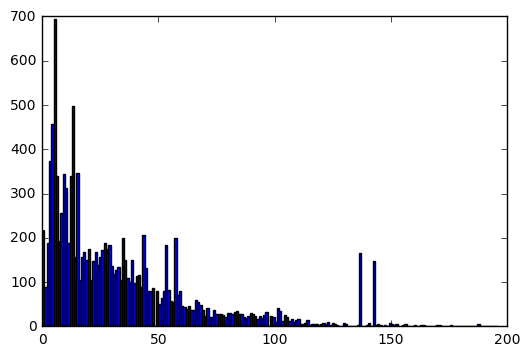

In [63]:
plt.hist(filtered_bot_lens, bins=200)

## Utterance char lengths for human and bot

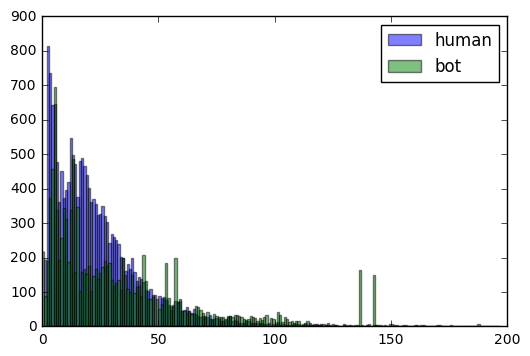

In [64]:
bins = 200

plt.hist(filtered_human_lens, bins, alpha=0.5, label='human')
plt.hist(filtered_bot_lens, bins, alpha=0.5, label='bot')
plt.legend(loc='upper right')

## Utterance evaluation distribution

In [65]:
dataset[2]


{'context': "Originally, every electronic component had wire leads, and the PCB had holes drilled for each wire of each component. The components' leads were then passed through the holes and soldered to the PCB trace. This method of assembly is called through-hole construction. In 1949, Moe Abramson and Stanislaus F. Danko of the United States Army Signal Corps developed the Auto-Sembly process in which component leads were inserted into a copper foil interconnection pattern and dip soldered. The patent they obtained in 1956 was assigned to the U.S. Army. With the development of board lamination and etching techniques, this concept evolved into the standard printed circuit board fabrication process in use today. Soldering could be done automatically by passing the board over a ripple, or wave, of molten solder in a wave-soldering machine. However, the wires and holes are wasteful since drilling holes is expensive and the protruding wires are merely cut off.",
 'dialogId': -749262821,


In [66]:
human_eval = []
bot_eval = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["thread"]:
        if u["userId"] == "Alice":
            if Alice:
                human_eval.append(u["evaluation"])
            else:
                bot_eval.append(u["evaluation"])
        elif u["userId"] == "Bob":
            if Bob:
                human_eval.append(u["evaluation"])
            else:
                bot_eval.append(u["evaluation"])

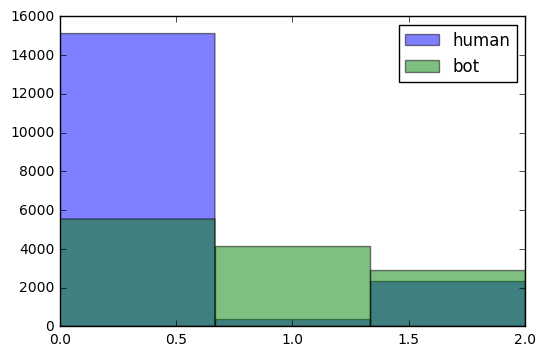

In [68]:
bins = 3

plt.hist(human_eval, bins, alpha=0.5, label='human')
plt.hist(bot_eval, bins, alpha=0.5, label='bot')
plt.legend(loc='upper right')

## Quality distribution

In [69]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["userId"] == "Alice":
            if Alice:
                human_quality.append(u["quality"])
            else:
                bot_quality.append(u["quality"])
        elif u["userId"] == "Bob":
            if Bob:
                human_eval.append(u["quality"])
            else:
                bot_eval.append(u["quality"])

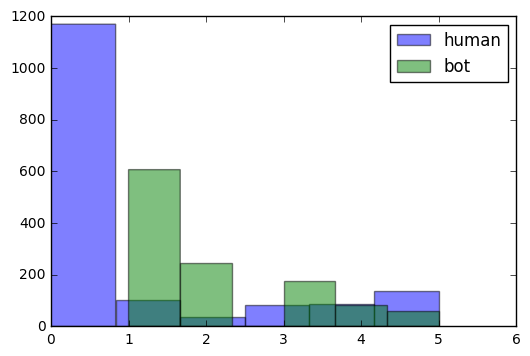

In [71]:
bins = 6

plt.hist(human_quality, bins, alpha=0.5, label='human')
plt.hist(bot_quality, bins, alpha=0.5, label='bot')
plt.legend(loc='upper right')

## Engagement distribution

In [72]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["userId"] == "Alice":
            if Alice:
                human_quality.append(u["engagement"])
            else:
                bot_quality.append(u["engagement"])
        elif u["userId"] == "Bob":
            if Bob:
                human_eval.append(u["engagement"])
            else:
                bot_eval.append(u["engagement"])

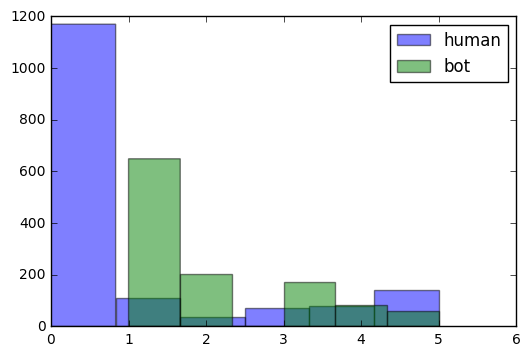

In [73]:
bins = 6

plt.hist(human_quality, bins, alpha=0.5, label='human')
plt.hist(bot_quality, bins, alpha=0.5, label='bot')
plt.legend(loc='upper right')

## Breadth distribution

In [74]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["userId"] == "Alice":
            if Alice:
                human_quality.append(u["breadth"])
            else:
                bot_quality.append(u["breadth"])
        elif u["userId"] == "Bob":
            if Bob:
                human_eval.append(u["breadth"])
            else:
                bot_eval.append(u["breadth"])

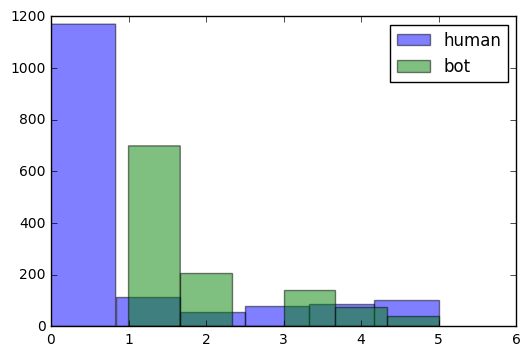

In [75]:
bins = 6

plt.hist(human_quality, bins, alpha=0.5, label='human')
plt.hist(bot_quality, bins, alpha=0.5, label='bot')
plt.legend(loc='upper right')

## English Proficiency distribution

In [76]:
profs = []
with open("assessors.list") as f:
    for line in f:
        profs.append(json.loads(line)["level"])

(array([  34.,   51.,  241.,  176.,   13.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 5 Patch objects>)

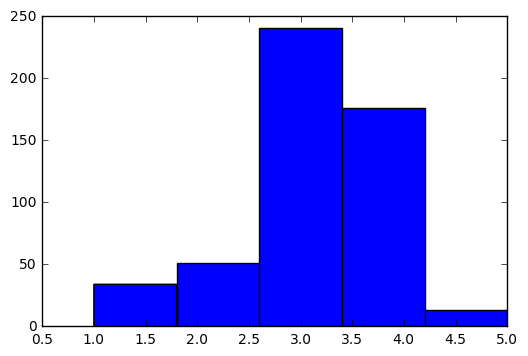

In [79]:
plt.hist(profs, bins=5)